In [269]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [301]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset into a DataFrame
df = pd.read_csv('dataset.csv')

# Drop irrelevant columns
df_cleaned = df.drop(columns=['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 'mode'])

# Handle missing values: drop rows with missing values
df_cleaned = df_cleaned.dropna()

# Remove duplicates
df_cleaned = df_cleaned.drop_duplicates()

# Convert 'danceability' to binary labels (0 for not danceable, 1 for danceable)
#df_cleaned['danceability_binary'] = df_cleaned['danceability'].apply(lambda x: 1 if x > 0.5 else 0)

# Select relevant columns
######features = ['duration_ms', 'popularity', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'explicit']
features = ['duration_ms', 'popularity', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'explicit']
features = ['liveness']
X = df_cleaned[features].copy()
y = df_cleaned['danceability']


# Normalize and standardize columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Display cleaned DataFrame info
df_cleaned.head()



,popularity,duration_ms,explicit,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,73,230666,False,0.676,0.4610,1,-6.746,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,55,149610,False,0.420,0.1660,1,-17.235,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,57,210826,False,0.438,0.3590,0,-9.734,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,71,201933,False,0.266,0.0596,0,-18.515,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,82,198853,False,0.618,0.4430,2,-9.681,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [302]:
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 106907 entries, 0 to 113999
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   popularity        106907 non-null  int64  
 1   duration_ms       106907 non-null  int64  
 2   explicit          106907 non-null  bool   
 3   danceability      106907 non-null  float64
 4   energy            106907 non-null  float64
 5   key               106907 non-null  int64  
 6   loudness          106907 non-null  float64
 7   speechiness       106907 non-null  float64
 8   acousticness      106907 non-null  float64
 9   instrumentalness  106907 non-null  float64
 10  liveness          106907 non-null  float64
 11  valence           106907 non-null  float64
 12  tempo             106907 non-null  float64
 13  time_signature    106907 non-null  int64  
 14  track_genre       106907 non-null  object 
dtypes: bool(1), float64(9), int64(4), object(1)
memory usage: 12.3+ MB
None


In [305]:
# Review the X variable DataFrame
print(X.head(10))
print(X.info())
print(X.describe())
print(X.columns)

   liveness
0    0.3580
1    0.1010
2    0.1170
3    0.1320
4    0.0829
5    0.1890
6    0.0913
7    0.0973
8    0.1510
9    0.0735
<class 'pandas.core.frame.DataFrame'>
Index: 106907 entries, 0 to 113999
Data columns (total 1 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   liveness  106907 non-null  float64
dtypes: float64(1)
memory usage: 1.6 MB
None
            liveness
count  106907.000000
mean        0.215544
std         0.192965
min         0.000000
25%         0.098200
50%         0.132000
75%         0.277000
max         1.000000
Index(['liveness'], dtype='object')


In [312]:
# Split the data into training and testing datasets by using

# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X_scaled, 
                                                    y, 
                                                    random_state=1)

In [314]:
# Import the LinearRegression module from SKLearn
from sklearn.linear_model import LinearRegression

# Instantiate the Linear Regression model
# Assign a random_state parameter of 1 to the model (not necessary, but for reproducibility)
lin_reg = LinearRegression(n_jobs=-1)  # n_jobs=-1 uses all available CPU cores

# Fit the model using training data
lin_reg.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [316]:
# Make a prediction using the testing data
y_predict = lin_reg.predict(X_test)

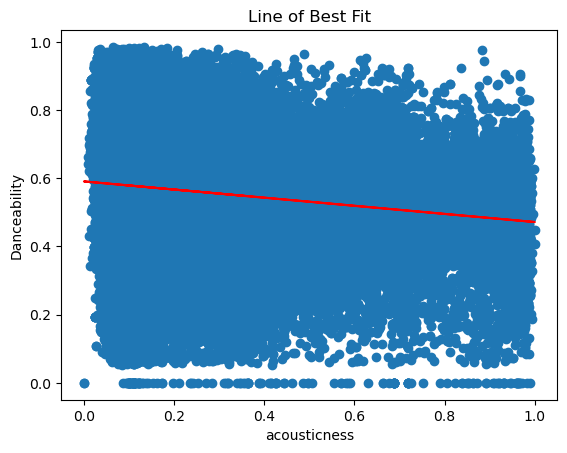

In [324]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Create a linear regression model
lr_model = LinearRegression()

# Fit the model using the training data
lr_model.fit(X, y)

# Get the coefficients (slope and intercept)
slope = lr_model.coef_[0]
intercept = lr_model.intercept_

# Plot the data points
plt.scatter(X, y)

# Plot the line of best fit
plt.plot(X, slope * X + intercept, color='red')

# Set labels and title
plt.xlabel('acousticness')
plt.ylabel('Danceability')
plt.title('Line of Best Fit')

# Show the plot
plt.show()

In [ ]:
###### features = ['duration_ms', 'popularity', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'explicit']

In [263]:
# Compute metrics for the linear regression model:  r2, mse, rmse, std
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
r2 = r2_score(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
std = np.std(y)

# Print relevant metrics.
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The standard deviation is {std}.")


The r2 is 0.008834435598675472.
The mean squared error is 0.22039482403471214.
The root mean squared error is 0.4694622711514868.
The standard deviation is 0.4715542286943798.


In [265]:
#### Hannah###
##Edit the x variables if needed to make a better fit if r^2 < 0.8 

##Could also use Random Forest Model or Logistic Regression, nut may need to change Danacability to a 0 or 1 in DF to use these models###

In [ ]:
##Sequel Stuff once uploaded to DataBricks

## Yalena